<a href="https://colab.research.google.com/github/gihanGT1/acs/blob/main/Gihan0071EE_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=e80767f98b5d94653837a79ed232df1f278169255506b27c6389e913ab521e9f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
64.21027287319421


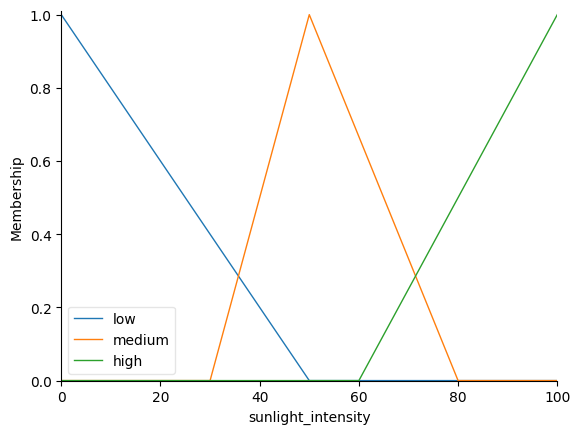

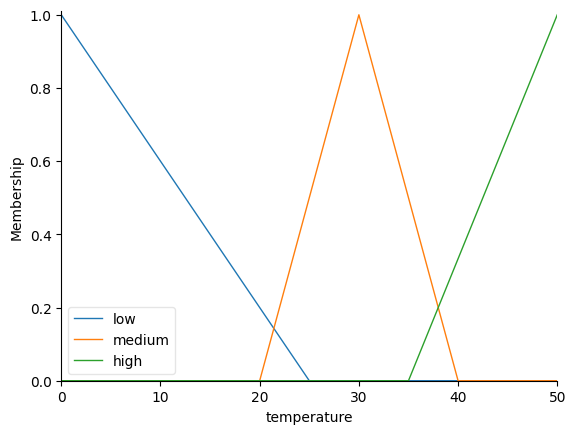

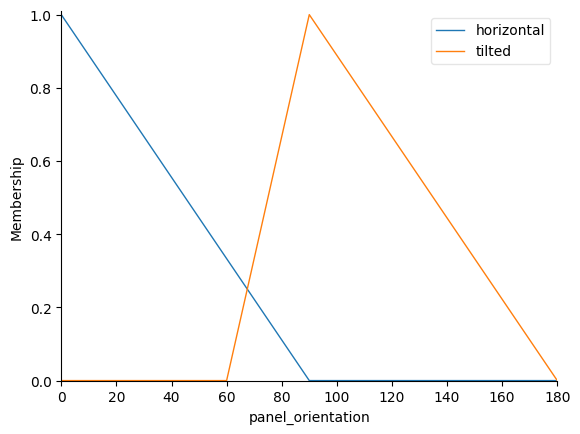

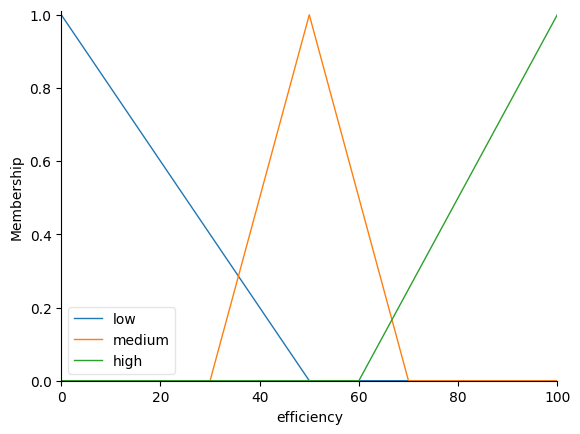

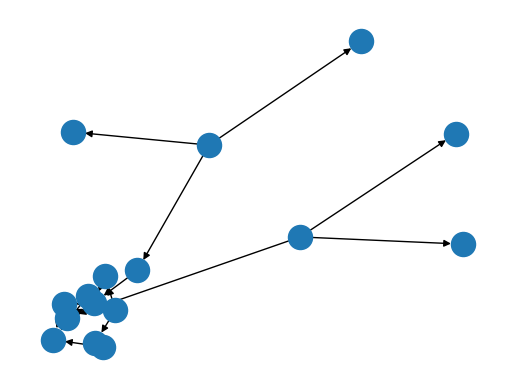

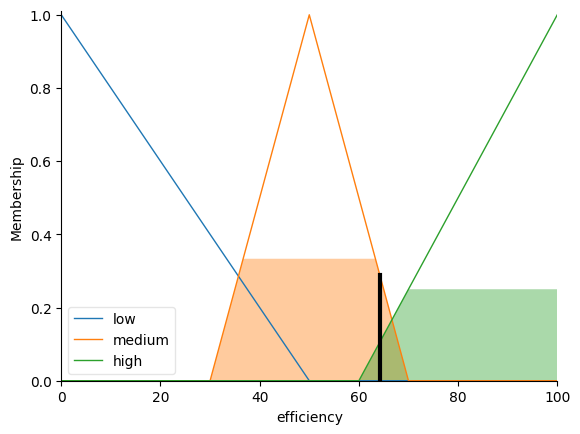

In [2]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sunlight_intensity = ctrl.Antecedent(np.arange(0, 101, 1), 'sunlight_intensity')
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
panel_orientation = ctrl.Antecedent(np.arange(0, 181, 1), 'panel_orientation')
efficiency = ctrl.Consequent(np.arange(0, 101, 1), 'efficiency')


sunlight_intensity['low'] = fuzz.trimf(sunlight_intensity.universe, [0, 0, 50])
sunlight_intensity['medium'] = fuzz.trimf(sunlight_intensity.universe, [30, 50, 80])
sunlight_intensity['high'] = fuzz.trimf(sunlight_intensity.universe, [60, 100, 100])


temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [20, 30, 40])
temperature['high'] = fuzz.trimf(temperature.universe, [35, 50, 50])


panel_orientation['horizontal'] = fuzz.trimf(panel_orientation.universe, [0, 0, 90])
panel_orientation['tilted'] = fuzz.trimf(panel_orientation.universe, [60, 90, 180])


efficiency['low'] = fuzz.trimf(efficiency.universe, [0, 0, 50])
efficiency['medium'] = fuzz.trimf(efficiency.universe, [30, 50, 70])
efficiency['high'] = fuzz.trimf(efficiency.universe, [60, 100, 100])


sunlight_intensity.view()
temperature.view()
panel_orientation.view()
efficiency.view()


rule1 = ctrl.Rule(sunlight_intensity['high'] & temperature['low'] & panel_orientation['horizontal'], efficiency['high'])
rule2 = ctrl.Rule(sunlight_intensity['medium'] & temperature['medium'] & panel_orientation['tilted'], efficiency['medium'])
rule3 = ctrl.Rule(sunlight_intensity['low'] & temperature['high'] & panel_orientation['horizontal'], efficiency['low'])
rule4 = ctrl.Rule(sunlight_intensity['high'] & temperature['medium'] & panel_orientation['tilted'], efficiency['high'])
rule5 = ctrl.Rule(sunlight_intensity['medium'] & temperature['high'] & panel_orientation['horizontal'], efficiency['medium'])


rule1.view()


efficiency_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
efficiency_sim = ctrl.ControlSystemSimulation(efficiency_ctrl)


efficiency_sim.input['sunlight_intensity'] = 70
efficiency_sim.input['temperature'] = 25
efficiency_sim.input['panel_orientation'] = 120


efficiency_sim.compute()
print(efficiency_sim.output['efficiency'])
efficiency.view(sim=efficiency_sim)
